In [1]:
import json
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import torch
from toolz import pipe

from pyrlmala.learning import LearningFactory
from pyrlmala.utils import Toolbox

In [2]:
plot_agent_500 = partial(Toolbox.plot_agent, steps_per_episode=500)

In [ ]:
stan_code_path = "banana.stan"
stan_data_path = "banana.json"

with open(stan_data_path, "r") as f:
    data = json.load(f)

    log_target_pdf = Toolbox.make_log_target_pdf(stan_code_path, data)
    grad_log_target_pdf = Toolbox.make_grad_log_target_pdf(stan_code_path, data)

In [4]:
sample_dim = 2
initial_sample = np.zeros(sample_dim)
algorithm = "ddpg"

learning_instance = LearningFactory.create_learning_instance(
    algorithm=algorithm,
    log_target_pdf=log_target_pdf,
    grad_log_target_pdf=grad_log_target_pdf,
    initial_sample=initial_sample,
    hyperparameter_config_path=f"../../config/{algorithm}.toml",
    actor_config_path="../../config/actor.toml",
    critic_config_path="../../config/critic.toml",
)

Training Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

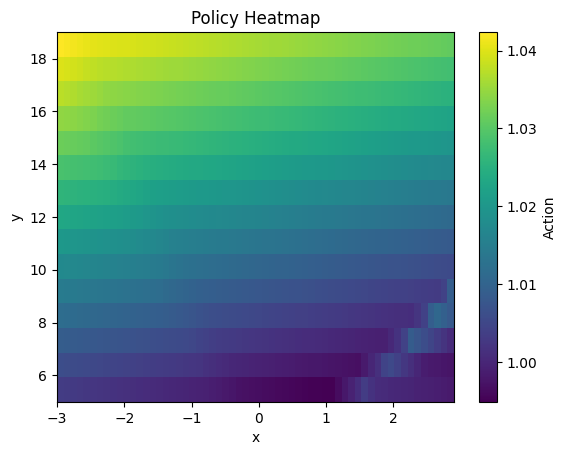

In [5]:
x_range = (-3, 3, 0.1)
y_range = (5, 20, 1)

policy = lambda x: learning_instance.actor(x.double())

Toolbox.policy_plot_2D_heatmap(policy, torch.arange(*x_range), torch.arange(*y_range))

In [6]:
learning_instance.train()

  0%|          | 0/50000 [00:00<?, ?it/s]

/home/congye/Code/PythonProjects/pyrlmala/src/pyrlmala/envs/env.py:202: RuntimeWarning: divide by zero encountered in log1p
  log_one_minus_alpha = np.log1p(-np.exp(log_alpha))


In [7]:
# learning_instance.predict()

/home/congye/Code/PythonProjects/pyrlmala/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.store_accepted_sample to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.store_accepted_sample` for environment variables or `env.get_wrapper_attr('store_accepted_sample')` that will search the reminding wrappers.
  logger.warn(


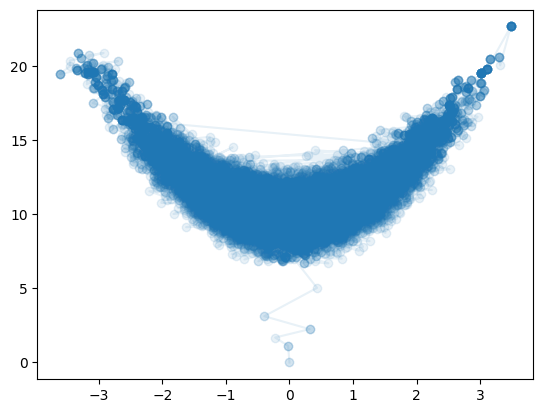

In [8]:
accepted_sample = pipe(
    learning_instance,
    lambda x: getattr(x, "env"),
    lambda x: x.get_attr("store_accepted_sample"),
)[0]

plt.plot(accepted_sample[:, 0], accepted_sample[:, 1], 'o-', alpha=0.1)
plt.show()

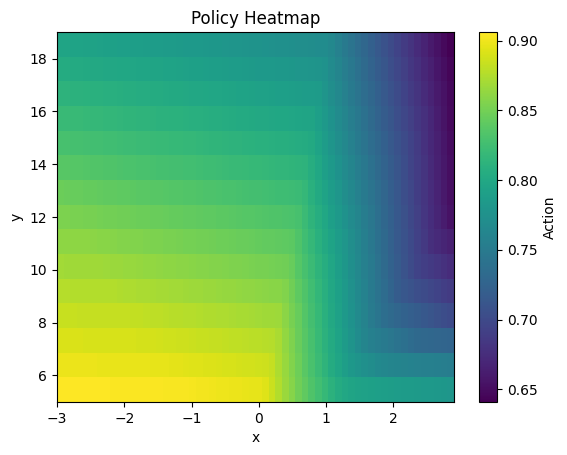

In [9]:
x_range = (-3, 3, 0.1)
y_range = (5, 20, 1)

policy = lambda x: learning_instance.actor(x.double())

Toolbox.policy_plot_2D_heatmap(policy, torch.arange(*x_range), torch.arange(*y_range))

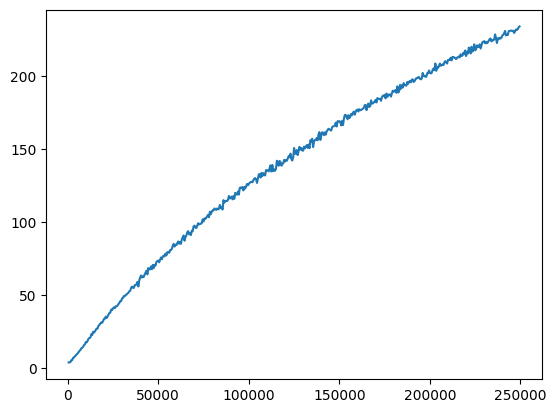

In [10]:
pipe(learning_instance, lambda x: getattr(x, "critic_values"), plot_agent_500)

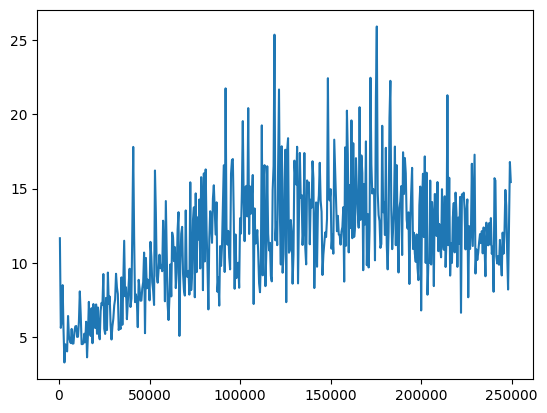

In [11]:
pipe(learning_instance, lambda x: getattr(x, "critic_loss"), plot_agent_500)

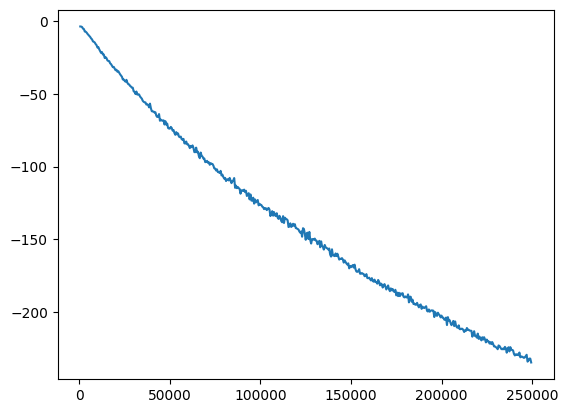

In [12]:
pipe(learning_instance, lambda x: getattr(x, "actor_loss"), plot_agent_500)

/home/congye/Code/PythonProjects/pyrlmala/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.store_reward to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.store_reward` for environment variables or `env.get_wrapper_attr('store_reward')` that will search the reminding wrappers.
  logger.warn(


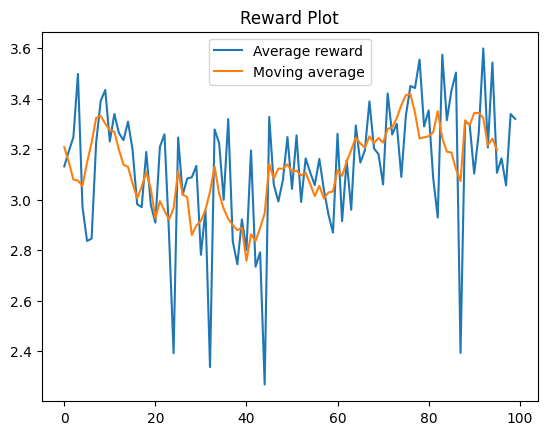

In [13]:
reward = pipe(
    learning_instance,
    lambda x: getattr(x, "env"),
    lambda x: x.get_attr("store_reward")[0],
    Toolbox.reward_plot
)